In [ ]:
#importamos las librerias

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
#normalizando los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

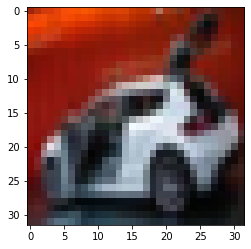

In [ ]:
plt.imshow(X_test[6])

In [ ]:
y_test[6]

array([1], dtype=uint8)

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
#añadimos la 3 capa

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
#añadimos la capa fully
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
#la capa de salida

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
# compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [ ]:
# Entrenar modelo

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 259s 165ms/step - loss: 1.3595 - sparse_categorical_accuracy: 0.5114
Epoch 2/5
1563/1563 [==============================] - 256s 164ms/step - loss: 0.9173 - sparse_categorical_accuracy: 0.6762
Epoch 3/5
1563/1563 [==============================] - 256s 164ms/step - loss: 0.7619 - sparse_categorical_accuracy: 0.7343
Epoch 4/5
1563/1563 [==============================] - 260s 167ms/step - loss: 0.6352 - sparse_categorical_accuracy: 0.7771
Epoch 5/5
1563/1563 [==============================] - 258s 165ms/step - loss: 0.5374 - sparse_categorical_accuracy: 0.8116


In [ ]:
#evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 40ms/step - loss: 0.7857 - sparse_categorical_accuracy: 0.7388


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7387999892234802


In [ ]:
#probamos que tan bien predice imagenes nuevas
import cv2
import numpy as np
import pandas as pd
import glob

new_data = []

#subimos la imagen de un auto y la redimensionamos con las dimensiones de las imagenes entrenadas none, 32,32.
files = glob.glob('/content/auto.jpg')
for myFile in files:
    image = cv2.imread(myFile)
    img = cv2.resize(image , (32 , 32)) # Reshaping the testing images to 32*32
    new_data.append(img)



new_data = np.reshape(new_data, (len(new_data),32,32,3))   
new_data

predictions = model.predict(new_data)
predictions[0]
np.argmax(predictions[0])

1

In [ ]:
#las clases son las siguientes
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

#anteriormente nos indica que un 1 = coche, por lo tanto fue certero el modelo en predecir la imagen.

In [ ]:
#subimos la iamgen de un barco

import cv2
import numpy as np
import pandas as pd
import glob

new_data = []


files = glob.glob('/content/barco.jpg')
for myFile in files:
    image = cv2.imread(myFile)
    img = cv2.resize(image , (32 , 32)) # Reshaping the testing images to 32*32
    new_data.append(img)



new_data = np.reshape(new_data, (len(new_data),32,32,3))   
new_data

predictions = model.predict(new_data)
predictions[0]
np.argmax(predictions[0])

8

In [ ]:
#subimos la imagen de un camion
import cv2
import numpy as np
import pandas as pd
import glob

new_data = []


files = glob.glob('/content/camion.jpg')
for myFile in files:
    image = cv2.imread(myFile)
    img = cv2.resize(image , (32 , 32)) # Reshaping the testing images to 32*32
    new_data.append(img)



new_data = np.reshape(new_data, (len(new_data),32,32,3))   
new_data

predictions = model.predict(new_data)
predictions[0]
np.argmax(predictions[0])

9